1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

2. Prepare Data

In [3]:
pd.options.display.max_columns = 50
df = pd.read_csv('data-final.csv', delimiter='\t')
df.drop(df.columns[50:], axis=1, inplace=True)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


3. Check missing values

In [4]:
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  True
How many missing values?  89150
Number of participants after eliminating missing values:  1013558


4. EDA

5. Clustering

# Creating K-means Cluster Model
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [5]:
df_model = df.copy()

# fit model

In [6]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

# Predicting the Clusters

In [7]:
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,...,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,...,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,...,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,...,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,...,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,...,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,...,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,...,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,1
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,...,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0,0
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,...,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,...,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,3


# Summing up the different questions groups

In [8]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums

,extroversion,neurotic,agreeable,conscientious,open,clusters
0,3.0,2.4,3.1,3.2,3.3,0
1,3.4,2.1,3.2,3.1,2.7,4
2,2.9,2.6,2.8,2.8,3.1,4
3,2.6,2.7,3.2,2.7,3.1,3
4,3.5,2.3,3.0,3.2,3.6,0
...,...,...,...,...,...,...
1015336,3.2,3.3,3.6,3.1,2.9,1
1015337,3.4,4.0,3.3,2.8,3.3,1
1015338,3.3,2.7,3.5,3.3,3.6,1
1015339,2.8,3.3,3.1,3.0,3.5,4


6. Analyze Clustered Data

In [ ]:
cluster0 = data_sums.loc[data_sums['clusters'] == 0]
cluster0.drop('clusters', axis=1, inplace=True)
cluster1 = data_sums.loc[data_sums['clusters'] == 1]
cluster1.drop('clusters', axis=1, inplace=True)
cluster2 = data_sums.loc[data_sums['clusters'] == 2]
cluster2.drop('clusters', axis=1, inplace=True)
cluster3 = data_sums.loc[data_sums['clusters'] == 3]
cluster3.drop('clusters', axis=1, inplace=True)
cluster4 = data_sums.loc[data_sums['clusters'] == 4]
cluster4.drop('clusters', axis=1, inplace=True)

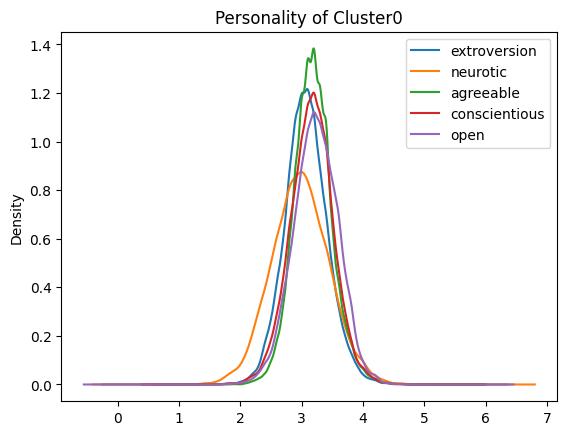

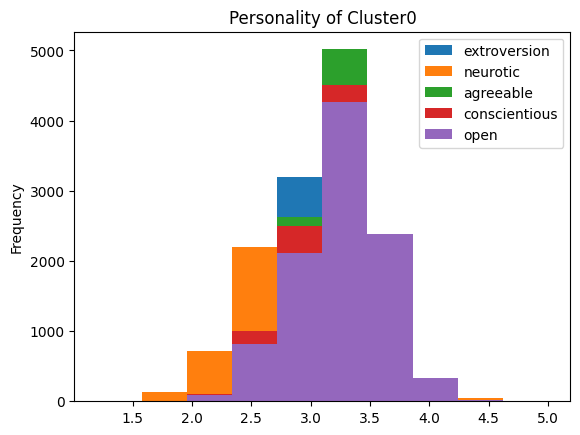

In [107]:
cluster0[:10025].plot(kind="kde", title='Personality of Cluster0')
cluster0[:10025].plot(kind="hist", title='Personality of Cluster0')
plt.show()

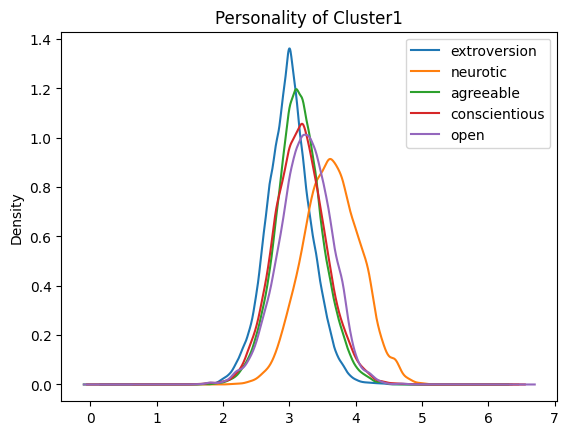

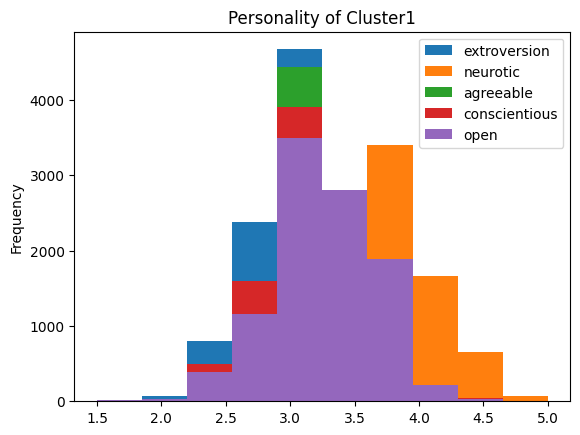

In [102]:
cluster1[:10025].plot(kind="kde", title='Personality of Cluster1')
cluster1[:10025].plot(kind="hist", title='Personality of Cluster1')
plt.show()

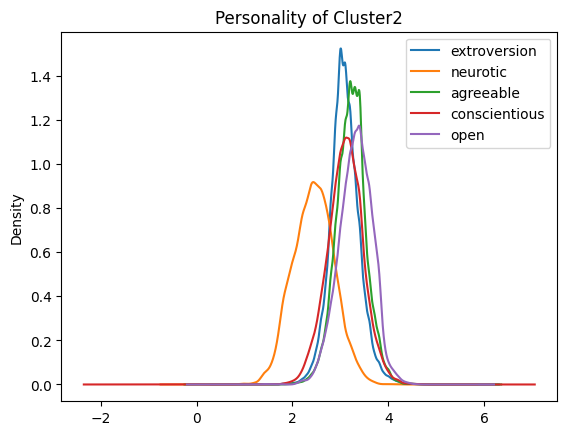

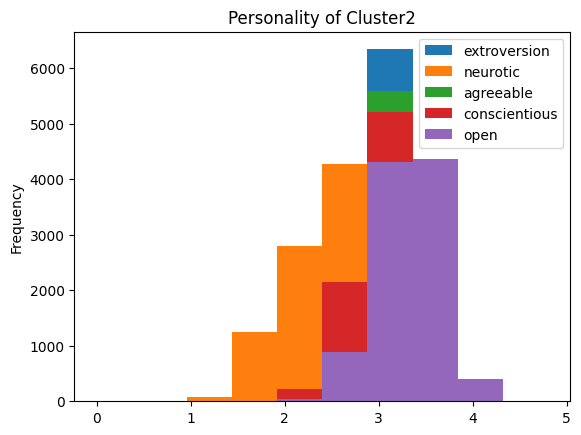

In [103]:
cluster2[:10025].plot(kind="kde", title='Personality of Cluster2')
cluster2[:10025].plot(kind="hist", title='Personality of Cluster2')
plt.show()

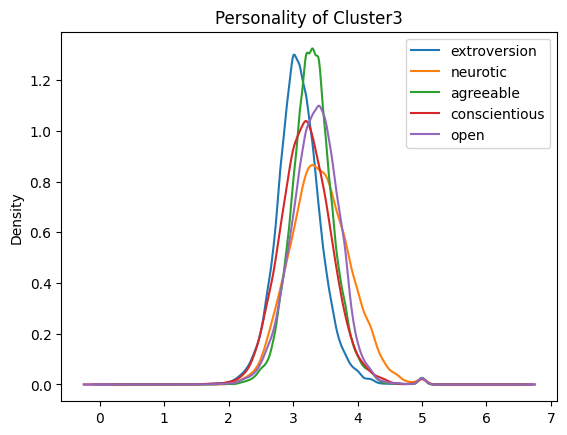

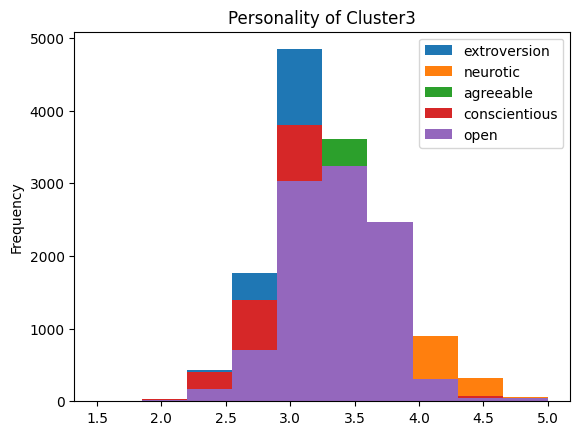

In [104]:
cluster3[:10025].plot(kind="kde", title='Personality of Cluster3')
cluster3[:10025].plot(kind="hist", title='Personality of Cluster3')
plt.show()

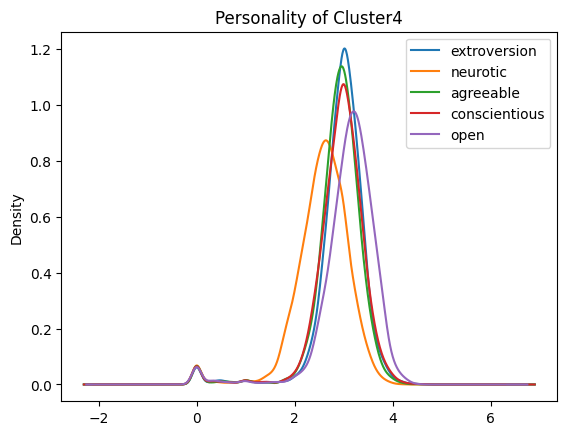

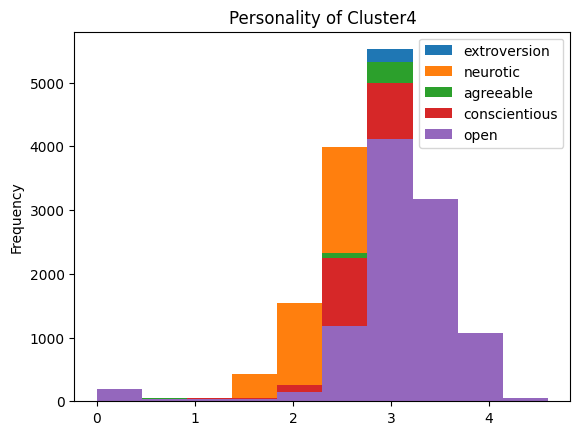

In [105]:
cluster4[:10025].plot(kind="kde", title='Personality of Cluster4')
cluster4[:10025].plot(kind="hist", title='Personality of Cluster4')
plt.show()

7. Training and Testing

In [11]:
X_train = data_sums.drop("clusters", axis=1)[1000:]
Y_train = data_sums["clusters"][1000:]
X_test = data_sums.drop("clusters", axis=1)[:1000]

print('X_train dimensions: ', X_train.shape)
print('Y_train dimensions: ', Y_train.shape)
print('X_test dimensions: ', X_test.shape)

X_train dimensions:  (1012558, 5)
Y_train dimensions:  (1012558,)
X_test dimensions:  (1000, 5)


8. Modeling

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [13]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


48.32

In [14]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

In [120]:
# Decision  Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

75.31

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [126]:
Y_pred[:10]

array([2, 0, 2, 2, 4, 2, 0, 2, 0, 0])

In [128]:
test = data_sums[:1000]
test['clusters'][:10]

0    2
1    0
2    0
3    4
4    2
5    2
6    3
7    2
8    2
9    4
Name: clusters, dtype: int32